# Global Human Settlement

In [1]:
# Sentinel Hub
from sentinelhub import (
    SHConfig, DataCollection, Geometry, BBox, CRS,
    SentinelHubRequest, filter_times, bbox_to_dimensions, MimeType,
    SentinelHubBYOC, ByocCollection, ByocTile, ByocCollectionAdditionalData,
    DownloadFailedException
)

In [3]:
creodias_config = SHConfig()
creodias_config.sh_base_url = 'https://creodias.sentinel-hub.com'

In [52]:
byoc = DataCollection.define(
        name='Global Human Settlement',
        api_id='byoc-3dbeea2c-3207-4c65-8a73-c29ce2675f89',  #Type
        catalog_id='3dbeea2c-3207-4c65-8a73-c29ce2675f89', # collection_id
        service_url='https://creodias.sentinel-hub.com', # End point
        is_timeless=False
    )
byoc

<DataCollection.Global Human Settlement: DataCollectionDefinition(
  api_id: byoc-3dbeea2c-3207-4c65-8a73-c29ce2675f89
  catalog_id: 3dbeea2c-3207-4c65-8a73-c29ce2675f89
  service_url: https://creodias.sentinel-hub.com
  is_timeless: False
  has_cloud_coverage: False
)>

In [69]:
from sentinelhub import bbox_to_dimensions

slovenia_bbox = BBox([-3, 51.4, -1.5, 52], crs=CRS.WGS84)

slovenia_size = bbox_to_dimensions(slovenia_bbox, resolution=50)

evalscript_byoc = """
//VERSION=3
function setup() {
  return {
    input: [ "PROB", "dataMask"],
    output: { bands: 2, sampleType: "AUTO"}
  };
}

function evaluatePixel(sample) {
  return [ sample.PROB,
           sample.dataMask
           ];
}
"""

byoc_request = SentinelHubRequest(
    evalscript=evalscript_byoc,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=byoc
        )],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.TIFF)
    ],
    bbox=slovenia_bbox,
    size=slovenia_size,
    config=config
)

byoc_data = byoc_request.get_data()
byoc_data

[array([[[255, 255],
         [  0, 255],
         [  0, 255],
         ...,
         [255, 255],
         [255, 255],
         [255, 255]],
 
        [[  0, 255],
         [  0, 255],
         [  0, 255],
         ...,
         [  0, 255],
         [  0, 255],
         [  0, 255]],
 
        [[  0, 255],
         [  0, 255],
         [  0, 255],
         ...,
         [  0, 255],
         [  0, 255],
         [  0, 255]],
 
        ...,
 
        [[  0, 255],
         [  0, 255],
         [  0, 255],
         ...,
         [255, 255],
         [255, 255],
         [  0, 255]],
 
        [[  0, 255],
         [  0, 255],
         [  0, 255],
         ...,
         [255, 255],
         [  0, 255],
         [  0, 255]],
 
        [[  0, 255],
         [  0, 255],
         [  0, 255],
         ...,
         [  0, 255],
         [  0, 255],
         [  0, 255]]], dtype=uint8)]

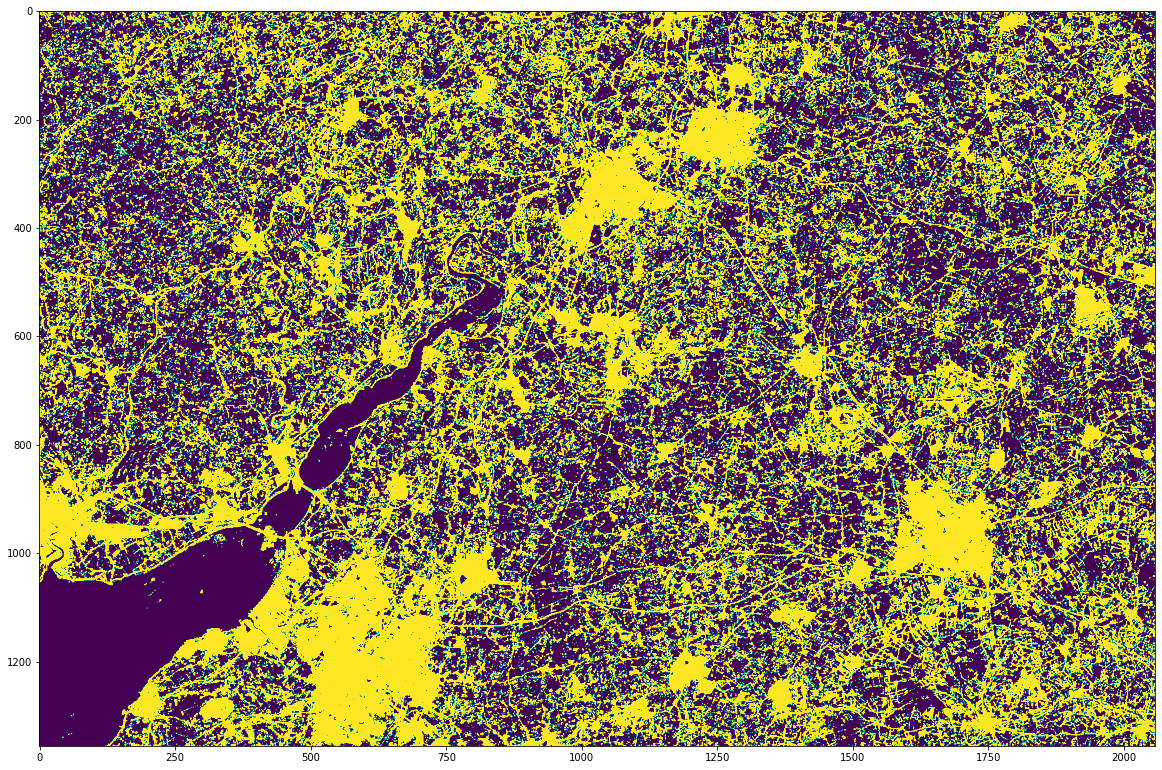

In [70]:
import matplotlib.pyplot as plt
import numpy as np

data = byoc_data[ 0 ]

plt.figure( figsize = (20,100) )
plt.imshow( data[ :, :, 0 ], vmin=0, vmax=100  )